In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import os
import glob
import tensorflow as tf

In [2]:
# Define directories
beijing_dir = 'Data/beijing'
guangzhou_dir = 'Data/guangzhou'
shanghai_dir = 'Data/shanghai'

# Define column names for each city
columns_names = [
    'Phone Number', 'Location Area Code', 'Cell Identity', 'Access Point Name',
    'IMEI', 'SGSN IP', 'GGSN IP', 'Start Time', 'End Time', 'Duration',
    'Uplink Traffic', 'Downlink Traffic', 'Radio Access Type (RAT)',
    'Source IP', 'Source Port', 'Destination IP', 'Destination Port',
    'Status Code', 'URL', 'User Agent', 'Content Type', 'Date', 'City'
]

# Process Beijing data
beijing_dataframes = []
for file in os.listdir(beijing_dir):
    if file.endswith('.csv'):
        file_path = os.path.join(beijing_dir, file)
        try:
            temp_df = pd.read_csv(file_path, header=None, on_bad_lines='skip')
            temp_df = temp_df.iloc[:, :len(columns_names)-1]  # Exclude City column
            while len(temp_df.columns) < len(columns_names)-1:
                temp_df[len(temp_df.columns)] = pd.NA
            
            # Set column names
            temp_df.columns = columns_names[:-1]
            temp_df['City'] = 'Beijing'
            
            beijing_dataframes.append(temp_df)
        except Exception as e:
            print(f"Skipping file {file} in Beijing: {e}")
beijing_combined = pd.concat(beijing_dataframes, ignore_index=True) if beijing_dataframes else pd.DataFrame(columns=columns_names)

# Process Guangzhou data
guangzhou_dataframes = []
for file in os.listdir(guangzhou_dir):
    if file.endswith('.csv'):
        file_path = os.path.join(guangzhou_dir, file)
        try:
            temp_df = pd.read_csv(file_path, header=None, on_bad_lines='skip')
            temp_df = temp_df.iloc[:, :len(columns_names)-1]  # Exclude City column
            while len(temp_df.columns) < len(columns_names)-1:
                temp_df[len(temp_df.columns)] = pd.NA
            
            # Set column names
            temp_df.columns = columns_names[:-1]
            
            # Add City column
            temp_df['City'] = 'Guangzhou'
            
            guangzhou_dataframes.append(temp_df)
        except Exception as e:
            print(f"Skipping file {file} in Guangzhou: {e}")
guangzhou_combined = pd.concat(guangzhou_dataframes, ignore_index=True) if guangzhou_dataframes else pd.DataFrame(columns=columns_names)

# Process Shanghai data
shanghai_dataframes = []
for file in os.listdir(shanghai_dir):
    if file.endswith('.csv'):
        file_path = os.path.join(shanghai_dir, file)
        try:
            temp_df = pd.read_csv(file_path, header=None, on_bad_lines='skip')
            temp_df = temp_df.iloc[:, :len(columns_names)-1]  # Exclude City column
            while len(temp_df.columns) < len(columns_names)-1:
                temp_df[len(temp_df.columns)] = pd.NA
            
            # Set column names
            temp_df.columns = columns_names[:-1]
            
            # Add City column
            temp_df['City'] = 'Shanghai'
            
            shanghai_dataframes.append(temp_df)
        except Exception as e:
            print(f"Skipping file {file} in Shanghai: {e}")
shanghai_combined = pd.concat(shanghai_dataframes, ignore_index=True) if shanghai_dataframes else pd.DataFrame(columns=columns_names)

# Combine all city datasets
all_cities_combined = pd.concat([beijing_combined, guangzhou_combined, shanghai_combined], ignore_index=True)

In [3]:
# Display results
print("\nBeijing Combined Dataset:")
print(beijing_combined)
print(beijing_combined.shape)
print("\nGuangzhou Combined Dataset:")
print(guangzhou_combined)
print(guangzhou_combined.shape)
print("\nShanghai Combined Dataset:")
print(shanghai_combined)
print(shanghai_combined.shape)
print("\nAll Cities Combined Dataset:")
print(all_cities_combined)
print(all_cities_combined.shape)


Beijing Combined Dataset:
                           Phone Number  Location Area Code  Cell Identity  \
0      A50E2F674B137B0428C74DB9B927D907               40984          17112   
1      A50E2F674B137B0428C74DB9B927D907               40984          17112   
2      A50E2F674B137B0428C74DB9B927D907               40984          17112   
3      A50E2F674B137B0428C74DB9B927D907               40984          17112   
4      A50E2F674B137B0428C74DB9B927D907               40984          17112   
...                                 ...                 ...            ...   
91783  0A360332CA646AD5349D33CD6A56B57E               41010          17626   
91784  0A360332CA646AD5349D33CD6A56B57E               41010          17626   
91785  0A360332CA646AD5349D33CD6A56B57E               41010          17626   
91786  0A360332CA646AD5349D33CD6A56B57E               41041          21016   
91787  0A360332CA646AD5349D33CD6A56B57E               41010          17626   

      Access Point Name      IMEI   

In [4]:
#drop duplicates
all_cities_combined.drop_duplicates(inplace=True)
all_cities_combined.shape
#remove unnecessary columns
all_cities_combined.drop(columns=[ 'Phone Number', 'Access Point Name',
    'IMEI', 'SGSN IP', 'GGSN IP','Source IP', 'Source Port', 'Destination IP',
      'Destination Port','Status Code', 'URL', 'User Agent', 'Content Type'], inplace=True)

all_cities_combined

,Location Area Code,Cell Identity,Start Time,End Time,Duration,Uplink Traffic,Downlink Traffic,Radio Access Type (RAT),Date,City
0,40984,17112,08:31.0,08:31.2,0,472,1171,1,NaN,Beijing
1,40984,17112,08:31.3,08:31.3,0,64,0,1,NaN,Beijing
2,40984,17112,08:31.7,08:31.7,0,64,0,1,NaN,Beijing
3,40984,17112,08:32.0,08:32.0,0,64,0,1,NaN,Beijing
4,40984,17112,08:31.0,08:34.3,3,819,7422,1,NaN,Beijing
...,...,...,...,...,...,...,...,...,...,...
452584,43044,10101,2015-08-31 23:12:42.285290,2015-08-31 23:19:58.312841,436,8609,11898,1,NaN,Shanghai
452585,43023,27471,2015-08-31 23:24:37.021775,2015-08-31 23:24:38.335714,1,1564,466,1,NaN,Shanghai
452586,43061,30543,2015-08-31 23:24:38.478795,2015-08-31 23:24:38.478795,0,60,0,1,NaN,Shanghai
452587,43044,10101,2015-08-31 23:20:00.744606,2015-08-31 23:20:00.822978,0,100,52,1,NaN,Shanghai


In [5]:
import pandas as pd

# Ensure 'Start Time' and 'End Time' are in string format for processing
all_cities_combined['Start Time'] = all_cities_combined['Start Time'].astype(str)
all_cities_combined['End Time'] = all_cities_combined['End Time'].astype(str)

# Define the date to prepend
date_to_prepend = '2015-08-01 '

# Identify rows where 'Start Time' does not contain a date
mask_start = ~all_cities_combined['Start Time'].str.contains('-')
mask_end = ~all_cities_combined['End Time'].str.contains('-')

# Prepend the date to the time values where necessary
all_cities_combined.loc[mask_start, 'Start Time'] = date_to_prepend + all_cities_combined.loc[mask_start, 'Start Time']
all_cities_combined.loc[mask_end, 'End Time'] = date_to_prepend + all_cities_combined.loc[mask_end, 'End Time']

# Convert 'Start Time' and 'End Time' to datetime format
all_cities_combined['Start Time'] = pd.to_datetime(all_cities_combined['Start Time'], errors='coerce')
all_cities_combined['End Time'] = pd.to_datetime(all_cities_combined['End Time'], errors='coerce')

# Ensure 'Date' is filled with the date part of 'Start Time' where available
all_cities_combined['Date'] = all_cities_combined['Start Time'].dt.date

# If 'Date' is still missing, use the date part of 'End Time'
all_cities_combined['Date'].fillna(all_cities_combined['End Time'].dt.date, inplace=True)

# Drop rows where both 'Start Time' and 'End Time' are missing
all_cities_combined.dropna(subset=['Start Time', 'End Time'], how='all', inplace=True)

# Check for any remaining missing values in 'Date'
print(f"Remaining missing 'Date' values: {all_cities_combined['Date'].isnull().sum()}")

# Preview the dataset
print(all_cities_combined[['Start Time', 'End Time', 'Date']].head())

C:\Users\pveer\AppData\Local\Temp\ipykernel_13792\3043811732.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_cities_combined['Start Time'] = pd.to_datetime(all_cities_combined['Start Time'], errors='coerce')
C:\Users\pveer\AppData\Local\Temp\ipykernel_13792\3043811732.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_cities_combined['End Time'] = pd.to_datetime(all_cities_combined['End Time'], errors='coerce')


Remaining missing 'Date' values: 0
           Start Time            End Time        Date
0 2015-08-01 08:31:00 2015-08-01 08:31:12  2015-08-01
1 2015-08-01 08:31:18 2015-08-01 08:31:18  2015-08-01
2 2015-08-01 08:31:42 2015-08-01 08:31:42  2015-08-01
3 2015-08-01 08:32:00 2015-08-01 08:32:00  2015-08-01
4 2015-08-01 08:31:00 2015-08-01 08:34:18  2015-08-01


C:\Users\pveer\AppData\Local\Temp\ipykernel_13792\3043811732.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_cities_combined['Date'].fillna(all_cities_combined['End Time'].dt.date, inplace=True)


In [6]:
all_cities_combined

,Location Area Code,Cell Identity,Start Time,End Time,Duration,Uplink Traffic,Downlink Traffic,Radio Access Type (RAT),Date,City
0,40984,17112,2015-08-01 08:31:00.000000,2015-08-01 08:31:12.000000,0,472,1171,1,2015-08-01,Beijing
1,40984,17112,2015-08-01 08:31:18.000000,2015-08-01 08:31:18.000000,0,64,0,1,2015-08-01,Beijing
2,40984,17112,2015-08-01 08:31:42.000000,2015-08-01 08:31:42.000000,0,64,0,1,2015-08-01,Beijing
3,40984,17112,2015-08-01 08:32:00.000000,2015-08-01 08:32:00.000000,0,64,0,1,2015-08-01,Beijing
4,40984,17112,2015-08-01 08:31:00.000000,2015-08-01 08:34:18.000000,3,819,7422,1,2015-08-01,Beijing
...,...,...,...,...,...,...,...,...,...,...
452584,43044,10101,2015-08-31 23:12:42.285290,2015-08-31 23:19:58.312841,436,8609,11898,1,2015-08-31,Shanghai
452585,43023,27471,2015-08-31 23:24:37.021775,2015-08-31 23:24:38.335714,1,1564,466,1,2015-08-31,Shanghai
452586,43061,30543,2015-08-31 23:24:38.478795,2015-08-31 23:24:38.478795,0,60,0,1,2015-08-31,Shanghai
452587,43044,10101,2015-08-31 23:20:00.744606,2015-08-31 23:20:00.822978,0,100,52,1,2015-08-31,Shanghai


In [7]:
print(f"Missing 'End Time': {all_cities_combined['End Time'].isnull().sum()}")
import pandas as pd

# Ensure 'Date','Start Time' and 'End Time' are in datetime format
all_cities_combined['Date'] = pd.to_datetime(all_cities_combined['Date'], errors='coerce')
all_cities_combined['Start Time'] = pd.to_datetime(all_cities_combined['Start Time'], errors='coerce')
all_cities_combined['End Time'] = pd.to_datetime(all_cities_combined['End Time'], errors='coerce')

#for the values in which start time does not contain a date
#fill it with 2015-08-01

# Fill 'Date' with the date part of 'Start Time' where available
all_cities_combined['Date'] = all_cities_combined['Start Time'].dt.date

# If 'Date' is still missing, use the date part of 'End Time'
all_cities_combined['Date'].fillna(all_cities_combined['End Time'].dt.date, inplace=True)
all_cities_combined.dropna(subset=['Start Time', 'End Time'], how='all', inplace=True)
# Check for any remaining missing values in 'Date'
print(f"Remaining missing 'Date' values: {all_cities_combined['Date'].isnull().sum()}")

# Preview the dataset
print(all_cities_combined[['Start Time', 'End Time', 'Date']].head())

Missing 'End Time': 19
Remaining missing 'Date' values: 0
           Start Time            End Time        Date
0 2015-08-01 08:31:00 2015-08-01 08:31:12  2015-08-01
1 2015-08-01 08:31:18 2015-08-01 08:31:18  2015-08-01
2 2015-08-01 08:31:42 2015-08-01 08:31:42  2015-08-01
3 2015-08-01 08:32:00 2015-08-01 08:32:00  2015-08-01
4 2015-08-01 08:31:00 2015-08-01 08:34:18  2015-08-01


C:\Users\pveer\AppData\Local\Temp\ipykernel_13792\3875072185.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_cities_combined['Date'].fillna(all_cities_combined['End Time'].dt.date, inplace=True)


In [8]:
#remove the missing start time and end time
all_cities_combined.dropna(subset=['Start Time', 'End Time'], inplace=True)
#add a new coloumn Total Traffic
# Total Traffic = Uplink Traffic + Downlink Traffic
#This will be Useful to classify the workload
all_cities_combined['Total Traffic'] = all_cities_combined['Uplink Traffic'] + all_cities_combined['Downlink Traffic']
missing_summary = all_cities_combined.isnull().sum()
print(missing_summary)


Location Area Code         0
Cell Identity              0
Start Time                 0
End Time                   0
Duration                   0
Uplink Traffic             0
Downlink Traffic           0
Radio Access Type (RAT)    0
Date                       0
City                       0
Total Traffic              0
dtype: int64


In [9]:
# Encode City columns
label_encoder = LabelEncoder()
# Encode 'City' columns
all_cities_combined['City'] = label_encoder.fit_transform(all_cities_combined['City'])

In [10]:
all_cities_combined

,Location Area Code,Cell Identity,Start Time,End Time,Duration,Uplink Traffic,Downlink Traffic,Radio Access Type (RAT),Date,City,Total Traffic
0,40984,17112,2015-08-01 08:31:00.000000,2015-08-01 08:31:12.000000,0,472,1171,1,2015-08-01,0,1643
1,40984,17112,2015-08-01 08:31:18.000000,2015-08-01 08:31:18.000000,0,64,0,1,2015-08-01,0,64
2,40984,17112,2015-08-01 08:31:42.000000,2015-08-01 08:31:42.000000,0,64,0,1,2015-08-01,0,64
3,40984,17112,2015-08-01 08:32:00.000000,2015-08-01 08:32:00.000000,0,64,0,1,2015-08-01,0,64
4,40984,17112,2015-08-01 08:31:00.000000,2015-08-01 08:34:18.000000,3,819,7422,1,2015-08-01,0,8241
...,...,...,...,...,...,...,...,...,...,...,...
452584,43044,10101,2015-08-31 23:12:42.285290,2015-08-31 23:19:58.312841,436,8609,11898,1,2015-08-31,2,20507
452585,43023,27471,2015-08-31 23:24:37.021775,2015-08-31 23:24:38.335714,1,1564,466,1,2015-08-31,2,2030
452586,43061,30543,2015-08-31 23:24:38.478795,2015-08-31 23:24:38.478795,0,60,0,1,2015-08-31,2,60
452587,43044,10101,2015-08-31 23:20:00.744606,2015-08-31 23:20:00.822978,0,100,52,1,2015-08-31,2,152


In [11]:
# Ensure 'Date','Start Time' and 'End Time' are in datetime format
all_cities_combined['Date'] = pd.to_datetime(all_cities_combined['Date'], errors='coerce')

In [12]:
# Ensure there are no conversion issues
print(all_cities_combined[['Date', 'Start Time', 'End Time']].dtypes)
# Extract Useful Features from Date & Time
all_cities_combined['Hour'] = all_cities_combined['Start Time'].dt.hour
all_cities_combined['Minute'] = all_cities_combined['Start Time'].dt.minute
all_cities_combined['Second'] = all_cities_combined['Start Time'].dt.second
all_cities_combined['Day_of_Week'] = all_cities_combined['Date'].dt.dayofweek
all_cities_combined['Is_Weekend'] = all_cities_combined['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

Date          datetime64[ns]
Start Time    datetime64[ns]
End Time      datetime64[ns]
dtype: object


In [13]:
#remove date part of the start time and end time
all_cities_combined['Start Time'] = all_cities_combined['Start Time'].dt.time
all_cities_combined['End Time'] = all_cities_combined['End Time'].dt.time
#date should contain only the date part
all_cities_combined['Date'] = all_cities_combined['Date'].dt.date

In [14]:
#save the all_cities_combined dataset
#all_cities_combined.to_csv('gru_all_cities_combined.csv', index=False)

In [15]:
all_cities_combined

,Location Area Code,Cell Identity,Start Time,End Time,Duration,Uplink Traffic,Downlink Traffic,Radio Access Type (RAT),Date,City,Total Traffic,Hour,Minute,Second,Day_of_Week,Is_Weekend
0,40984,17112,08:31:00,08:31:12,0,472,1171,1,2015-08-01,0,1643,8,31,0,5,1
1,40984,17112,08:31:18,08:31:18,0,64,0,1,2015-08-01,0,64,8,31,18,5,1
2,40984,17112,08:31:42,08:31:42,0,64,0,1,2015-08-01,0,64,8,31,42,5,1
3,40984,17112,08:32:00,08:32:00,0,64,0,1,2015-08-01,0,64,8,32,0,5,1
4,40984,17112,08:31:00,08:34:18,3,819,7422,1,2015-08-01,0,8241,8,31,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452584,43044,10101,23:12:42.285290,23:19:58.312841,436,8609,11898,1,2015-08-31,2,20507,23,12,42,0,0
452585,43023,27471,23:24:37.021775,23:24:38.335714,1,1564,466,1,2015-08-31,2,2030,23,24,37,0,0
452586,43061,30543,23:24:38.478795,23:24:38.478795,0,60,0,1,2015-08-31,2,60,23,24,38,0,0
452587,43044,10101,23:20:00.744606,23:20:00.822978,0,100,52,1,2015-08-31,2,152,23,20,0,0,0


In [16]:
gru_all_cities_combined = all_cities_combined.copy()
gru_all_cities_combined

,Location Area Code,Cell Identity,Start Time,End Time,Duration,Uplink Traffic,Downlink Traffic,Radio Access Type (RAT),Date,City,Total Traffic,Hour,Minute,Second,Day_of_Week,Is_Weekend
0,40984,17112,08:31:00,08:31:12,0,472,1171,1,2015-08-01,0,1643,8,31,0,5,1
1,40984,17112,08:31:18,08:31:18,0,64,0,1,2015-08-01,0,64,8,31,18,5,1
2,40984,17112,08:31:42,08:31:42,0,64,0,1,2015-08-01,0,64,8,31,42,5,1
3,40984,17112,08:32:00,08:32:00,0,64,0,1,2015-08-01,0,64,8,32,0,5,1
4,40984,17112,08:31:00,08:34:18,3,819,7422,1,2015-08-01,0,8241,8,31,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452584,43044,10101,23:12:42.285290,23:19:58.312841,436,8609,11898,1,2015-08-31,2,20507,23,12,42,0,0
452585,43023,27471,23:24:37.021775,23:24:38.335714,1,1564,466,1,2015-08-31,2,2030,23,24,37,0,0
452586,43061,30543,23:24:38.478795,23:24:38.478795,0,60,0,1,2015-08-31,2,60,23,24,38,0,0
452587,43044,10101,23:20:00.744606,23:20:00.822978,0,100,52,1,2015-08-31,2,152,23,20,0,0,0


In [17]:
missing_summary = all_cities_combined.isnull().sum()
print(missing_summary)

Location Area Code         0
Cell Identity              0
Start Time                 0
End Time                   0
Duration                   0
Uplink Traffic             0
Downlink Traffic           0
Radio Access Type (RAT)    0
Date                       0
City                       0
Total Traffic              0
Hour                       0
Minute                     0
Second                     0
Day_of_Week                0
Is_Weekend                 0
dtype: int64


In [18]:
gru_all_cities_combined.shape

(448533, 16)

In [19]:
#print all the dates in the dataset
print(gru_all_cities_combined['Date'].unique())

[datetime.date(2015, 8, 1) datetime.date(2015, 8, 2)
 datetime.date(2015, 7, 31) datetime.date(2015, 8, 3)
 datetime.date(2015, 8, 4) datetime.date(2015, 8, 5)
 datetime.date(2015, 8, 6) datetime.date(2015, 8, 7)
 datetime.date(2015, 8, 8) datetime.date(2015, 8, 9)
 datetime.date(2015, 8, 10) datetime.date(2015, 8, 11)
 datetime.date(2015, 8, 12) datetime.date(2015, 8, 13)
 datetime.date(2015, 8, 14) datetime.date(2015, 8, 15)
 datetime.date(2015, 8, 16) datetime.date(2015, 8, 17)
 datetime.date(2015, 8, 18) datetime.date(2015, 8, 19)
 datetime.date(2015, 8, 20) datetime.date(2015, 8, 21)
 datetime.date(2015, 8, 22) datetime.date(2015, 8, 23)
 datetime.date(2015, 8, 24) datetime.date(2015, 8, 25)
 datetime.date(2015, 8, 26) datetime.date(2015, 8, 27)
 datetime.date(2015, 8, 28) datetime.date(2015, 8, 29)
 datetime.date(2015, 8, 30) datetime.date(2015, 8, 31)
 datetime.date(2015, 9, 1)]


In [20]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df1 = gru_all_cities_combined.copy()

# Sort by Date and Start Time (important for time series modeling)
df1 = df1.sort_values(by=['Date', 'Start Time'])
df1.info()
df1.head(5)

#date is a datetime object convert into a categorical variable using label encoder
df1['Date'] = df1['Date'].astype(str)
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df1['Date'] = label_encoder.fit_transform(df1['Date'])

# Drop non-numeric columns
df1.drop(columns=['Start Time', 'End Time'], inplace=True)

# Print selected features
print("Selected Features:", df1.columns.tolist())

# Separate features and target
features = df1.drop(columns=['Total Traffic'])
target = df1['Total Traffic']


<class 'pandas.core.frame.DataFrame'>
Index: 448533 entries, 110849 to 379411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Location Area Code       448533 non-null  int64 
 1   Cell Identity            448533 non-null  int64 
 2   Start Time               448533 non-null  object
 3   End Time                 448533 non-null  object
 4   Duration                 448533 non-null  int64 
 5   Uplink Traffic           448533 non-null  int64 
 6   Downlink Traffic         448533 non-null  int64 
 7   Radio Access Type (RAT)  448533 non-null  int64 
 8   Date                     448533 non-null  object
 9   City                     448533 non-null  int64 
 10  Total Traffic            448533 non-null  int64 
 11  Hour                     448533 non-null  int32 
 12  Minute                   448533 non-null  int32 
 13  Second                   448533 non-null  int32 
 14  Day_of_Week         

In [22]:
df1

,Location Area Code,Cell Identity,Duration,Uplink Traffic,Downlink Traffic,Radio Access Type (RAT),Date,City,Total Traffic,Hour,Minute,Second,Day_of_Week,Is_Weekend
110849,42274,25271,71572,4140,2622,1,0,1,6762,5,1,33,4,0
104531,42260,37805,49350,368,208,1,0,1,576,10,28,31,4,0
95068,42245,8788,45378,790,700,1,0,1,1490,12,43,0,4,0
105677,42256,8292,38552,600,340,1,0,1,940,14,19,30,4,0
386183,43024,21932,34566,476,252,1,0,2,728,14,38,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91056,41004,10232,0,116,0,1,32,0,116,0,0,7,1,0
379443,42241,31207,0,81,121,1,32,1,202,0,0,8,1,0
90998,41074,10113,0,212,0,1,32,0,212,0,0,12,1,0
379378,42577,39913,0,100,0,1,32,1,100,0,0,12,1,0


In [23]:
# Determine split sizes
total_size = len(features)
train_size = int(total_size * 0.7)
val_size = int(total_size * 0.15)
test_size = total_size - train_size - val_size  # Remaining 15%

# Split using time series strategy (no shuffling!)
X_train_raw = features.iloc[:train_size]
y_train_raw = target.iloc[:train_size]

X_val_raw = features.iloc[train_size:train_size + val_size]
y_val_raw = target.iloc[train_size:train_size + val_size]

X_test_raw = features.iloc[train_size + val_size:]
y_test_raw = target.iloc[train_size + val_size:]


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Feature Scaling
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train_raw)
X_val = scaler_x.transform(X_val_raw)
X_test = scaler_x.transform(X_test_raw)

# Log transform and scale target
y_train_log = np.log1p(y_train_raw)
y_val_log = np.log1p(y_val_raw)
y_test_log = np.log1p(y_test_raw)

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train_log.values.reshape(-1, 1))
y_val = scaler_y.transform(y_val_log.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test_log.values.reshape(-1, 1))


In [25]:
import torch
import numpy as np
import random
import os

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, X_train.shape[1])
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).view(-1, 1, X_val.shape[1])
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, X_test.shape[1])
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [27]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

# Define GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, hidden = self.gru(x)
        out = self.fc(hidden[-1])
        return out

# Initialize model
input_size = X_train.shape[1]
hidden_size = 128
num_layers = 4
output_size = 1
dropout = 0.3

model = GRUModel(input_size, hidden_size, num_layers, output_size, dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader):.6f}")

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).numpy()
    y_pred_test = scaler_y.inverse_transform(y_pred_test)
    y_test_inv = scaler_y.inverse_transform(y_test_tensor.numpy())

r2 = r2_score(y_test_inv, y_pred_test)
print(f"R² Score on Test Set: {r2:.6f}")


Epoch [1/100], Loss: 0.001797
Epoch [2/100], Loss: 0.000741
Epoch [3/100], Loss: 0.000643
Epoch [4/100], Loss: 0.000580
Epoch [5/100], Loss: 0.000521
Epoch [6/100], Loss: 0.000484
Epoch [7/100], Loss: 0.000452
Epoch [8/100], Loss: 0.000424
Epoch [9/100], Loss: 0.000407
Epoch [10/100], Loss: 0.000388
Epoch [11/100], Loss: 0.000378
Epoch [12/100], Loss: 0.000365
Epoch [13/100], Loss: 0.000349
Epoch [14/100], Loss: 0.000338
Epoch [15/100], Loss: 0.000332
Epoch [16/100], Loss: 0.000319
Epoch [17/100], Loss: 0.000307
Epoch [18/100], Loss: 0.000308
Epoch [19/100], Loss: 0.000300
Epoch [20/100], Loss: 0.000286
Epoch [21/100], Loss: 0.000284
Epoch [22/100], Loss: 0.000276
Epoch [23/100], Loss: 0.000279
Epoch [24/100], Loss: 0.000265
Epoch [25/100], Loss: 0.000265
Epoch [26/100], Loss: 0.000267
Epoch [27/100], Loss: 0.000253
Epoch [28/100], Loss: 0.000250
Epoch [29/100], Loss: 0.000237
Epoch [30/100], Loss: 0.000240
Epoch [31/100], Loss: 0.000234
Epoch [32/100], Loss: 0.000230
Epoch [33/100], L

In [28]:
# Evaluate model on test set
model.eval()
with torch.no_grad():
    y_pred_train= model(X_train_tensor).numpy()
    y_pred_train = scaler_y.inverse_transform(y_pred_train)
    y_train_inv = scaler_y.inverse_transform(y_train_tensor.numpy())
    r2 = r2_score(y_train_inv, y_pred_train)

print(f"R² Score on Train Set: {r2:.6f}")

R² Score on Train Set: 0.993913


In [29]:
# Validation phase
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)

print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.6f}, Validation Loss: {val_loss.item():.6f}")

# Evaluate model on test set
model.eval()
with torch.no_grad():
    y_pred_test= model(X_test_tensor).numpy()
    y_pred_test = scaler_y.inverse_transform(y_pred_test)
    y_test_inv = scaler_y.inverse_transform(y_test_tensor.numpy())
    r2 = r2_score(y_test_inv, y_pred_test)

print(f"R² Score on Test Set: {r2:.6f}")


# Evaluate model on Validation set
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val_tensor).numpy()
    y_pred_val = scaler_y.inverse_transform(y_pred_val)
    y_val_inv = scaler_y.inverse_transform(y_val_tensor.numpy())
    r2 = r2_score(y_val_inv, y_pred_val)

print(f"R² Score on Validation Set: {r2:.6f}")

Epoch [100/100], Training Loss: 0.000031, Validation Loss: 0.000086
R² Score on Test Set: 0.982187
R² Score on Validation Set: 0.993979


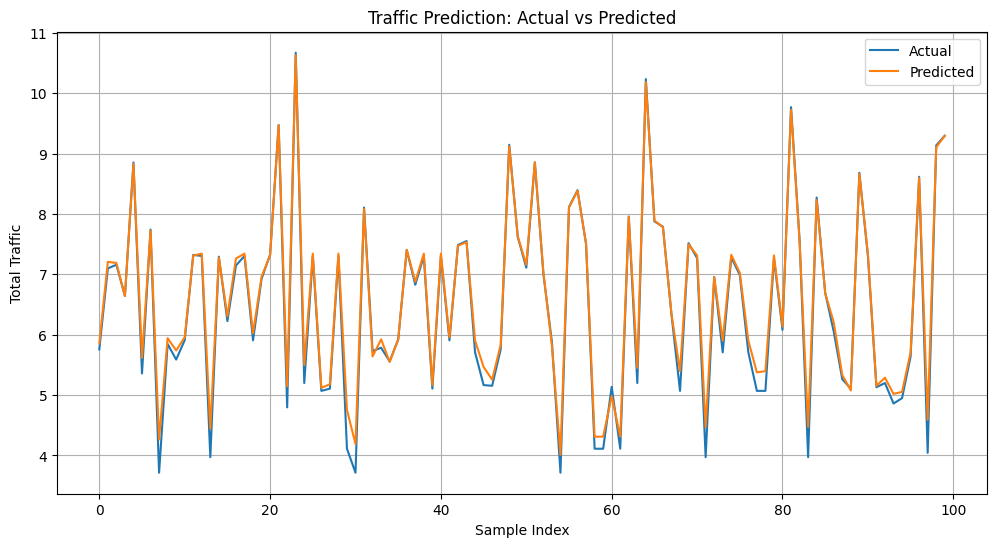

In [30]:
#plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:100], label='Actual')
plt.plot(y_pred_test[:100], label='Predicted')
plt.title('Traffic Prediction: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Total Traffic')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# True values (y_test_inv) and predicted values (y_pred_test)
mae = mean_absolute_error(y_test_inv, y_pred_test)
mse = mean_squared_error(y_test_inv, y_pred_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 0.13131943345069885
MSE: 0.060628216713666916


In [33]:
#save the GRU model
torch.save(model.state_dict(), 'gru_model_scale.pth')